In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import torch
IMAGE_SIZE = (480, 640, 3)
TEST_PATH = "drive/My Drive/ENS491 Bitirme Projesi/Tests/"
PRED_BATCH_SIZE = 1
DEVICE = torch.device("cuda") if torch.cuda.is_available() else "cpu"
MIDAS_OUTPUT = "drive/My Drive/ENS491 Bitirme Projesi/Tests/Pred"

In [19]:
from torchvision.transforms import Compose, ToTensor, Resize
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import os
# create the test dataset with a test transform pipeline and
# initialize the test data loader
testTransform = Compose([
	Resize((IMAGE_SIZE[0], IMAGE_SIZE[0])), ToTensor()])
testDataset = ImageFolder(TEST_PATH, testTransform)
testLoader = DataLoader(testDataset, batch_size=PRED_BATCH_SIZE, shuffle=True)

In [20]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.0 MB/s eta 0:00:00


In [21]:
# initialize the midas model using torch hub
modelType = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDaS", modelType)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to /root/.cache/torch/hub/checkpoints/dpt_large_384.pt
100%|██████████| 1.28G/1.28G [00:14<00:00, 92.4MB/s]


In [22]:
# flash the model to the device and set it to eval mode
midas.to(torch.device("cpu"))
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [29]:
print(len(sweeper))

11


In [34]:
images

tensor([[[[0.7569, 0.7569, 0.7529,  ..., 0.4588, 0.4235, 0.4078],
          [0.7529, 0.7569, 0.7529,  ..., 0.4510, 0.4118, 0.3961],
          [0.7529, 0.7569, 0.7569,  ..., 0.4431, 0.4000, 0.3843],
          ...,
          [0.3137, 0.3216, 0.3255,  ..., 0.3765, 0.3922, 0.4000],
          [0.3294, 0.3373, 0.3373,  ..., 0.3647, 0.3882, 0.4039],
          [0.3294, 0.3373, 0.3373,  ..., 0.3647, 0.3882, 0.4039]],

         [[0.7333, 0.7373, 0.7451,  ..., 0.3608, 0.3451, 0.3333],
          [0.7412, 0.7412, 0.7451,  ..., 0.3647, 0.3490, 0.3294],
          [0.7333, 0.7373, 0.7490,  ..., 0.3725, 0.3490, 0.3216],
          ...,
          [0.2824, 0.2863, 0.3059,  ..., 0.3333, 0.3333, 0.3412],
          [0.3020, 0.3098, 0.3137,  ..., 0.3647, 0.3647, 0.3608],
          [0.3059, 0.3137, 0.3098,  ..., 0.3294, 0.3922, 0.3922]],

         [[0.6941, 0.6941, 0.6902,  ..., 0.3098, 0.2980, 0.2706],
          [0.6941, 0.6941, 0.6902,  ..., 0.3098, 0.2980, 0.2706],
          [0.6980, 0.6980, 0.6941,  ..., 0

In [50]:
images.size()


torch.Size([1, 3, 480, 480])

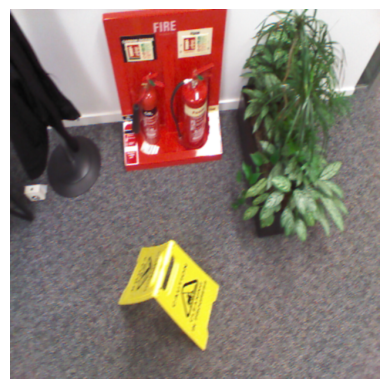

In [53]:
import matplotlib.pyplot as plt
import torch

# Assuming your tensor is named 'output_tensor'
output_tensor = images  # Replace this with your actual tensor

# Convert the tensor to a NumPy array
output_array = output_tensor.squeeze().permute(1, 2, 0).numpy()

# Normalize the values to the range [0, 1] (assuming the tensor values are in the range [-1, 1])
output_array = (output_array - output_array.min()) / (output_array.max() - output_array.min())

# Display the image using matplotlib
plt.imshow(output_array)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

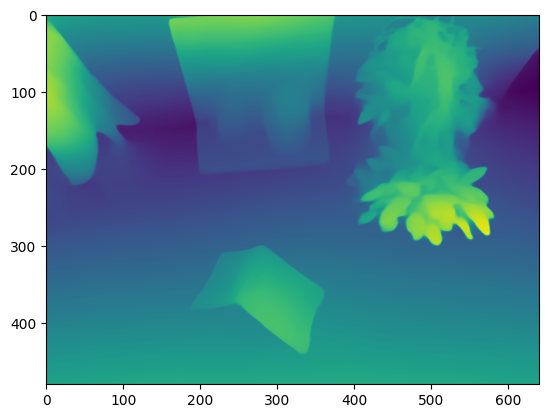

In [57]:
plt.imshow(output)

In [42]:
# initialize iterable variable
sweeper = iter(testLoader)
# grab a batch of test data send the images to the device
print("[INFO] getting the test data...")
batch = next(sweeper)
(images, _) = (batch[0], batch[1])
#images = next(iter(testLoader))
images = images.to(DEVICE)

# turn off auto grad
with torch.no_grad():
	# get predictions from input
	prediction = midas(images)
	# unsqueeze the predictions batchwise
	prediction = torch.nn.functional.interpolate(
		prediction.unsqueeze(1), size=[IMAGE_SIZE[0],IMAGE_SIZE[1]], mode="bicubic",
		align_corners=False).squeeze()
# store the predictions in a numpy array
output = prediction.cpu().numpy()

[INFO] getting the test data...


In [26]:
import numpy as np

[INFO] saving the inference...


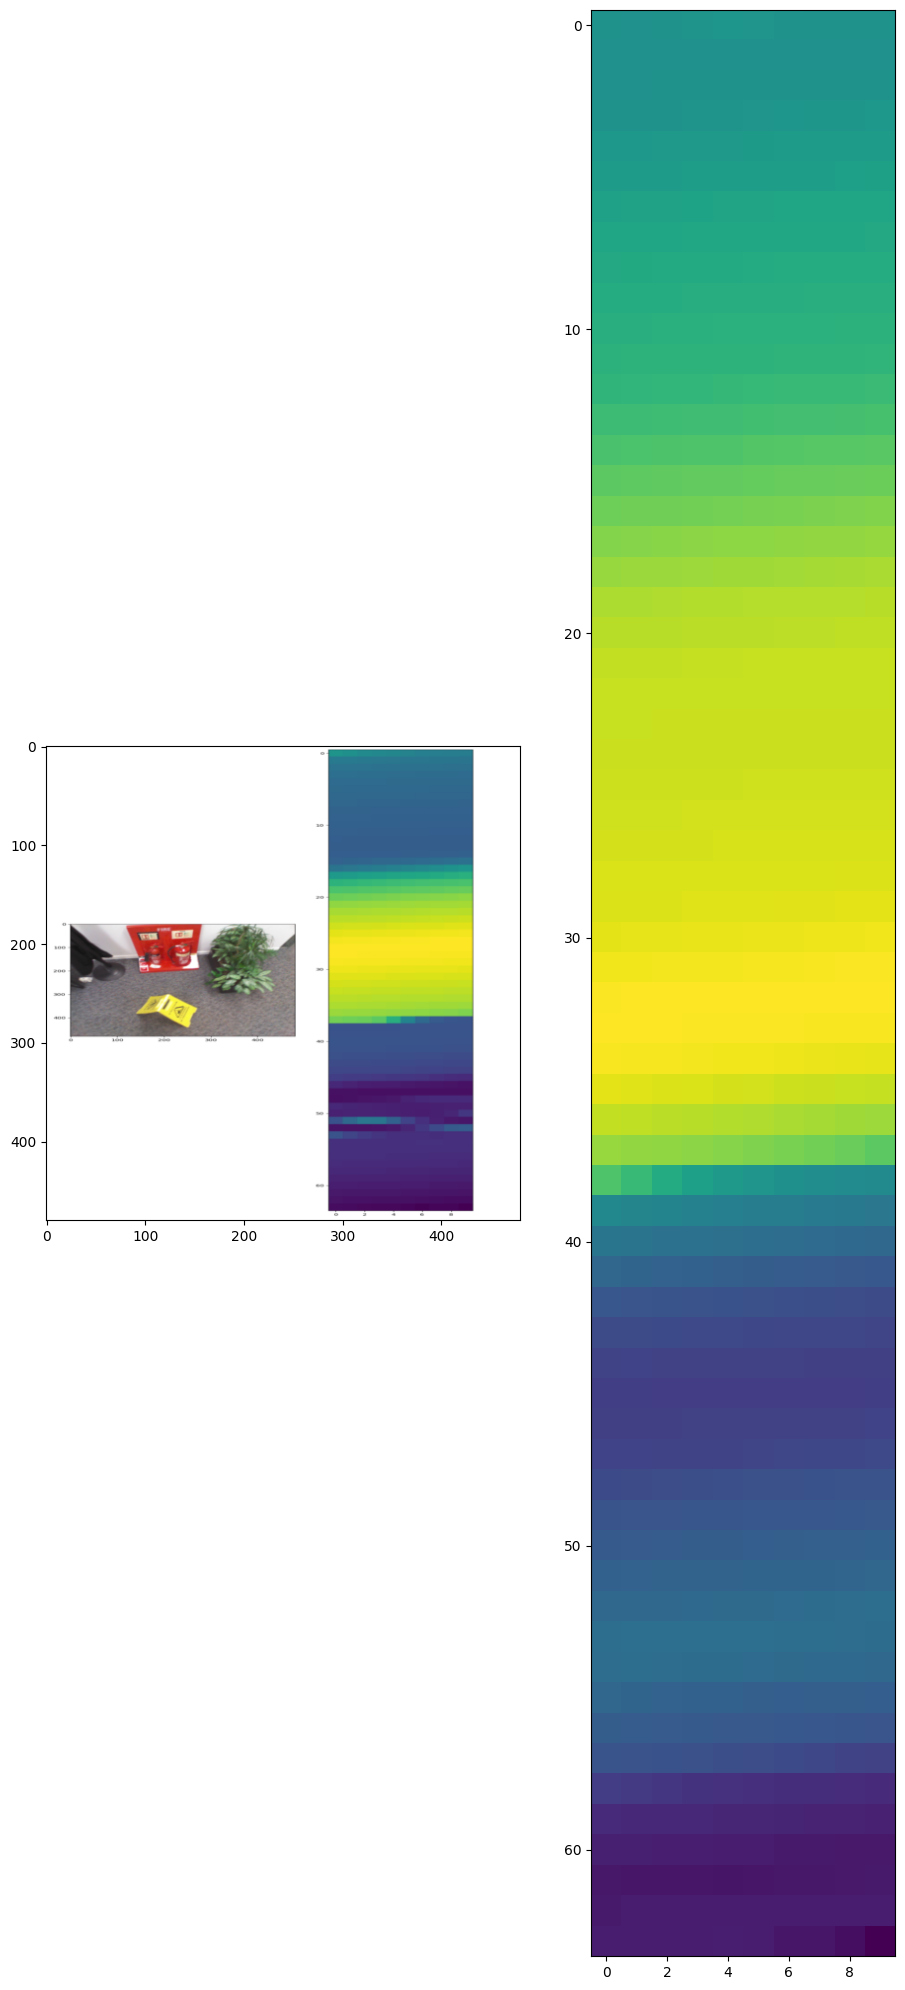

In [27]:
# define row and column variables
rows = PRED_BATCH_SIZE
cols = 2
# define axes for subplots
axes = []
fig=plt.figure(figsize=(10, 20))
# loop over the rows and columns
for totalRange in range(rows*cols):
	axes.append(fig.add_subplot(rows, cols, totalRange+1))
	# set up conditions for side by side plotting
	# of ground truth and predictions
	if totalRange % 2 == 0:
		plt.imshow(images[totalRange//2]
			.permute((1, 2, 0)).cpu().detach().numpy())
	else :
		plt.imshow(np.reshape(output[totalRange//2], (64,10)))
fig.tight_layout()
# build the midas output directory if not already present
if not os.path.exists(MIDAS_OUTPUT):
	os.makedirs(MIDAS_OUTPUT)
# save plots to output directory
print("[INFO] saving the inference...")
outputFileName = os.path.join(MIDAS_OUTPUT, "output.png")
plt.savefig(outputFileName)